In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit

In [2]:
#Data paths
dataset_path_1st = '../data/bearing-dataset/1st_test/1st_test'
dataset_path_2nd = '../data/bearing-dataset/2nd_test/2nd_test'
dataset_path_3rd = '../data/bearing-dataset/3rd_test/4th_test/txt'

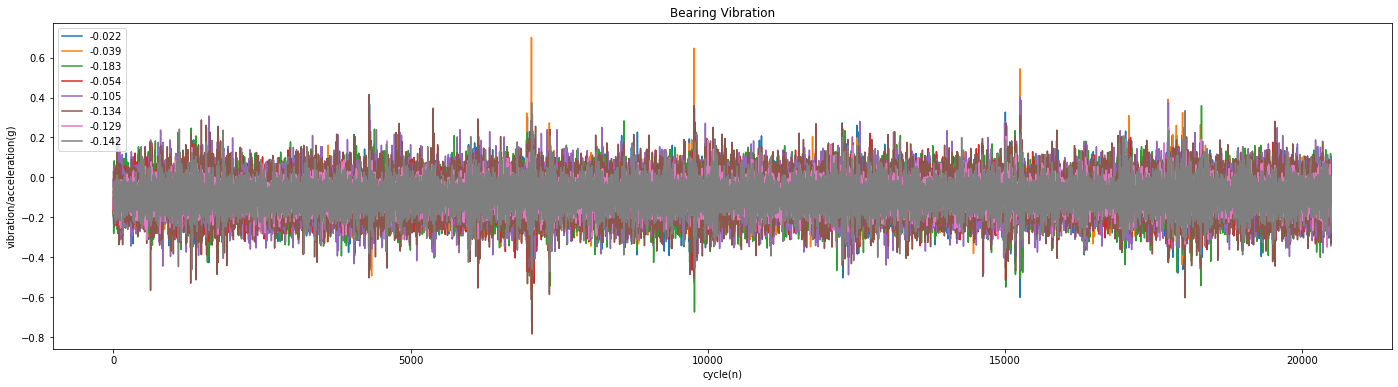

In [3]:
# Test for the first file
dataset = pd.read_csv('../data/bearing-dataset/1st_test/1st_test/2003.10.22.12.06.24', sep='\t')
ax = dataset.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

In [4]:
# Root Mean Squared Sum
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

# extract peak-to-peak features
def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)
# extract clearence factor
def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result

In [5]:
def time_features(dataset_path, id_set=None):
    time_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
    cols1 = ['B1_x','B1_y','B2_x','B2_y','B3_x','B3_y','B4_x','B4_y']
    cols2 = ['B1','B2','B3','B4']
    
    # initialize
    if id_set == 1:
        columns = [c+'_'+tf for c in cols1 for tf in time_features]
        data = pd.DataFrame(columns=columns)
    else:
        columns = [c+'_'+tf for c in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)

        
        
    for filename in os.listdir(dataset_path):
        # read dataset
        raw_data = pd.read_csv(os.path.join(dataset_path, filename), sep='\t')
        
        # time features
        mean_abs = np.array(raw_data.abs().mean())
        std = np.array(raw_data.std())
        skew = np.array(raw_data.skew())
        kurtosis = np.array(raw_data.kurtosis())
        entropy = calculate_entropy(raw_data)
        rms = np.array(calculate_rms(raw_data))
        max_abs = np.array(raw_data.abs().max())
        p2p = calculate_p2p(raw_data)
        crest = max_abs/rms
        clearence = np.array(calculate_clearence(raw_data))
        shape = rms / mean_abs
        impulse = max_abs / mean_abs
        
        if id_set == 1:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,8), columns=[c+'_mean' for c in cols1])
            std = pd.DataFrame(std.reshape(1,8), columns=[c+'_std' for c in cols1])
            skew = pd.DataFrame(skew.reshape(1,8), columns=[c+'_skew' for c in cols1])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,8), columns=[c+'_kurtosis' for c in cols1])
            entropy = pd.DataFrame(entropy.reshape(1,8), columns=[c+'_entropy' for c in cols1])
            rms = pd.DataFrame(rms.reshape(1,8), columns=[c+'_rms' for c in cols1])
            max_abs = pd.DataFrame(max_abs.reshape(1,8), columns=[c+'_max' for c in cols1])
            p2p = pd.DataFrame(p2p.reshape(1,8), columns=[c+'_p2p' for c in cols1])
            crest = pd.DataFrame(crest.reshape(1,8), columns=[c+'_crest' for c in cols1])
            clearence = pd.DataFrame(clearence.reshape(1,8), columns=[c+'_clearence' for c in cols1])
            shape = pd.DataFrame(shape.reshape(1,8), columns=[c+'_shape' for c in cols1])
            impulse = pd.DataFrame(impulse.reshape(1,8), columns=[c+'_impulse' for c in cols1])
            
        else:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,4), columns=[c+'_mean' for c in cols2])
            std = pd.DataFrame(std.reshape(1,4), columns=[c+'_std' for c in cols2])
            skew = pd.DataFrame(skew.reshape(1,4), columns=[c+'_skew' for c in cols2])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,4), columns=[c+'_kurtosis' for c in cols2])
            entropy = pd.DataFrame(entropy.reshape(1,4), columns=[c+'_entropy' for c in cols2])
            rms = pd.DataFrame(rms.reshape(1,4), columns=[c+'_rms' for c in cols2])
            max_abs = pd.DataFrame(max_abs.reshape(1,4), columns=[c+'_max' for c in cols2])
            p2p = pd.DataFrame(p2p.reshape(1,4), columns=[c+'_p2p' for c in cols2])
            crest = pd.DataFrame(crest.reshape(1,4), columns=[c+'_crest' for c in cols2])
            clearence = pd.DataFrame(clearence.reshape(1,4), columns=[c+'_clearence' for c in cols2])
            shape = pd.DataFrame(shape.reshape(1,4), columns=[c+'_shape' for c in cols2])
            impulse = pd.DataFrame(impulse.reshape(1,4), columns=[c+'_impulse' for c in cols2])
            
        mean_abs.index = [filename]
        std.index = [filename]
        skew.index = [filename]
        kurtosis.index = [filename]
        entropy.index = [filename]
        rms.index = [filename]
        max_abs.index = [filename]
        p2p.index = [filename]
        crest.index = [filename]
        clearence.index = [filename]
        shape.index = [filename]
        impulse.index = [filename] 
        
        # concat
        merge = pd.concat([mean_abs, std, skew, kurtosis, entropy, rms, max_abs, p2p,crest,clearence, shape, impulse], axis=1)
        data = data.append(merge)
        
    if id_set == 1:
        cols = [c+'_'+tf for c in cols1 for tf in time_features]
        data = data[cols]
    else:
        cols = [c+'_'+tf for c in cols2 for tf in time_features]
        data = data[cols]
        
    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()
    return data                                  

In [6]:
# set1 = time_features(dataset_path_1st, id_set=1)
# set1.to_csv('set1_timefeatures.csv')

In [7]:
set1 = pd.read_csv("./set1_timefeatures.csv")
set1 = set1.rename(columns={'Unnamed: 0':'time'})
#set1 = set1.set_index('time')
last_cycle = int(len(set1))

In [8]:
features = set1.copy()
#simple moving average SMA
ma = pd.DataFrame()
ma['B4_x_mean'] = features['B4_x_mean']
ma['SMA'] = ma['B4_x_mean'].rolling(window=5).mean()
ma['time'] = features['time']

In [9]:
#Cumulative Moving Average
ma['CMA'] = ma["B4_x_mean"].expanding(min_periods=10).mean()

In [10]:
#Exponantial Moving Average
ma['EMA'] = ma['B4_x_mean'].ewm(span=40,adjust=False).mean()

<AxesSubplot:xlabel='time'>

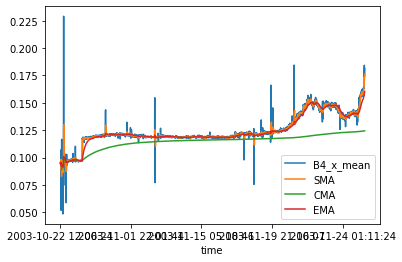

In [11]:
ma.plot(x="time", y= ['B4_x_mean','SMA','CMA','EMA'])


In [12]:
def health_indicator(bearing_data,use_filter=False):    
    data = bearing_data.copy()

    if use_filter:
        for ft in data.columns:
            data[ft] = data[ft].ewm(span=40,adjust=False).mean()
    
    pca = PCA()
    X_pca = pca.fit_transform(data)
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    print("Explained variance of Pricincipal Component 1 is:"+str(pca.explained_variance_ratio_[0]))
    
    health_indicator = np.array(X_pca['PC1'])
    degredation = pd.DataFrame(health_indicator,columns=['PC1'])
    degredation['cycle'] = degredation.index
    degredation['PC1'] = degredation['PC1']-degredation['PC1'].min(axis=0)
    
    return degredation

def exp_fit(x, a, b):
    y = a*np.exp(abs(b)*x)
    return y

def fit_exp(df,base=500,print_parameters=False):
    x = np.array(df.cycle)
    x = x[-base:].copy()
    y = np.array(df.PC1)
    y = y[-base:].copy()

    #initial parameters affect the result
    fit = curve_fit(exp_fit, x,y, p0=[0.01,0.001], maxfev=10000)
    if print_parameters:
        print(fit)
    return fit

def fit_ses(data):
    from statsmodels.tsa.holtwinters import SimpleExpSmoothing
    model = SimpleExpSmoothing(data)
    model_fit = model.fit()
    yhat = model_fit.predict(len(data), len(data))
    return yhat

def predict(X_df, p):
    x = np.array(X_df.cycle)
    a, b= p[0]
    fit_eq = exp_fit(x, a, b)
    return fit_eq
log = [[],[],[]]

In [13]:
#variable for incrementing index
prediction_cycle = 600
#variable for keeping intial value
init_cycle = prediction_cycle
# 更新模型间隔，预测时间范围
increment_cycle = 25

In [14]:
#selected_features = ['mean','std','kurtosis','skew','entropy',
#        'rms','max','p2p','crest','shape','impulse']
selected_features = ['max','p2p','rms']

bearing = 3
B_x = ["B{}_x_".format(bearing)+i for i in selected_features]
early_cycles = set1[B_x][:init_cycle]
early_cycles_pca = health_indicator(early_cycles,use_filter=True)

Explained variance of Pricincipal Component 1 is:0.9955862512721826


In [ ]:
while prediction_cycle <= len(set1):
    #run this again, again to simulate life-cycle of a bearing
    data = set1[B_x][:prediction_cycle]
    ind=data.index
    degredation = health_indicator(data,use_filter=True)
    # degredation.plot(y='PC1',x='cycle')
    fit = fit_exp(degredation,base=250)

    prediction = predict(degredation,fit)
    m, n = fit[0]
    # 通过自定义设定，需要外部提供
    thres = 2
    #print(prediction_cycle)
    # 根据阈值计算预警出现时间，提供预警功能时开启
    fail_cycle = (np.log(thres/m))/abs(n)
    log[0].append(prediction_cycle)
    log[1].append(fail_cycle)
    log[2].append(fit[0])

    print("a = {}, b = {}".format(m, n))
    print('failed at '+str(fail_cycle))

    fig =plt.figure('Cycle: '+str(prediction_cycle))
    ax =fig.subplots()

    ax.plot([0,prediction_cycle],[2,2])
    ax.scatter(degredation['cycle'],degredation['PC1'],color='b',s=5)
    ax.plot(degredation['cycle'],prediction,color='r',alpha=0.7)
    ax.set_title('Cycle: '+str(prediction_cycle))
    ax.legend(['threshold','prediction'])
    fig.savefig('output.png')
    plt.show()

    prediction_cycle += increment_cycle

In [16]:


#True labels represent Warnings!
d = {'time':set1['time'][init_cycle::increment_cycle],'cycle': log[0], 'prediction': (np.array(log[1])), 'parameters': log[2]}
df = pd.DataFrame(data=d)
df['isvalid'] = df['prediction']<2156
#adding real labels for analysing results
df['real'] = np.zeros(len(set1['time'][init_cycle::increment_cycle]))

for row in set1['time'][init_cycle::increment_cycle].index:
    if bearing == 1:
        if row<=151:
            df['real'][row] = 'early'
        if 151 < row <=600:
            df['real'][row] = "suspect"
        if 600 < row <=1499:
            df['real'][row] = "normal"
        if 1499 < row <=2098:
            df['real'][row] = "suspect"
        if 2098 < row <= 2156:
            df['real'][row] =("imminent_failure")
    if bearing == 2:
        if row<=500:
            df['real'][row] =("early")
        if 500 < row <=2000:
            df['real'][row] =("normal")
        if 2000 < row <=2120:
            df['real'][row] =("suspect")
        if 2120< row <=2156:
            df['real'][row] =("imminet_failure")

    if bearing == 3:
        if row<=500:
            df['real'][row] =("early")
        if 500 < row <= 1790:
            df['real'][row] =("normal")
        if 1790 < row <=2120:
            df['real'][row] =("suspect")
        if 2120 < row <=2156:
            df['real'][row] =("Inner_race_failure")
    if bearing == 4:
        if row<=200:
            df['real'][row] =("early")
        if 200 < row <=1000:
            df['real'][row] =("normal")
        if 1000 < row <= 1435:
            df['real'][row] =("suspect")
        if 1435 < row <=1840:
            df['real'][row] =("Inner_race_failure")
        if 1840 < row <=2156:
            df['real'][row] =("Stage_two_failure")

print(bearing)
print(df.tail(60))

3
                     time  cycle    prediction  \
675   2003-11-09 00:51:44    675  1.070261e+11   
700   2003-11-09 05:01:44    700  7.456935e+10   
725   2003-11-09 09:05:58    725  5.603196e+10   
750   2003-11-09 13:15:58    750  3.526824e+11   
775   2003-11-09 17:25:58    775  1.006630e+11   
800   2003-11-10 01:05:58    800  2.235317e+11   
825   2003-11-10 05:15:58    825  2.143898e+11   
850   2003-11-10 09:25:58    850  2.272813e+11   
875   2003-11-10 13:35:58    875  1.743586e+11   
900   2003-11-14 12:12:17    900  1.952472e+11   
925   2003-11-14 16:22:17    925  4.386690e+12   
950   2003-11-14 20:58:46    950  1.541924e+11   
975   2003-11-15 01:08:46    975  5.128398e+11   
1000  2003-11-15 05:18:46   1000  1.313464e+11   
1025  2003-11-15 09:28:46   1025  1.986800e+11   
1050  2003-11-15 13:38:46   1050  5.795317e+10   
1075  2003-11-15 17:48:46   1075  8.488848e+11   
1100  2003-11-15 21:58:46   1100  4.891699e+10   
1125  2003-11-16 02:08:46   1125  6.270214e+10  

/tmp/ipykernel_805/84666235.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['real'][row] =("normal")
/root/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
df[['time', 'parameters']]

,time,parameters
600,2003-11-08 12:21:44,"[0.050598108812705246, 5.415579869269817e-12]"
625,2003-11-08 16:31:44,"[0.05040370594082867, -9.852628288935544e-11]"
650,2003-11-08 20:41:44,"[0.05872844392845401, -2.5388066001451467e-11]"
675,2003-11-09 00:51:44,"[0.06325694023686433, -3.2269678121118025e-11]"
700,2003-11-09 05:01:44,"[0.08680442565676301, 4.2071506460227544e-11]"
...,...,...
2050,2003-11-24 10:51:24,"[0.010096425620329771, 0.0028167378531578904]"
2075,2003-11-24 16:47:32,"[0.01540719834584917, 0.0026297568529759056]"
2100,2003-11-24 20:57:32,"[0.0614601055255475, 0.0019294725972208656]"
2125,2003-11-25 11:47:32,"[0.4074145268914446, -0.0009589684998340856]"


In [18]:
def array_zero_replace_median(foo):
    # Compute the median of the non-zero elements
    m = np.median(foo[foo > 0])
    # Assign the median to the zero elements 
    foo[foo == 0] = m
    return foo

def array_zero_replace_after(foo):
    # Compute the median of the non-zero elements
    zero_index = np.where(foo==0)[0]
    # Assign the median to the zero elements 
    for index in zero_index:
        if index + 1 == len(foo):
            foo[index] = foo[index - 1]
            return foo
        foo[index] = foo[index + 1]
    return foo

In [ ]:
prediction_cycle = 600
while prediction_cycle <= len(set1):

    data = set1[B_x][:prediction_cycle]
    ind=data.index
    df = health_indicator(data,use_filter=True)
    x = np.array(df.cycle)
    x = x[-320:].copy()
    y = np.array(df.PC1)
    y = y[-320:].copy()


    from statsmodels.tsa.holtwinters import Holt

    y = array_zero_replace_after(y)
    fit1 = Holt(
        y[:300],
        exponential=True,
        damped_trend=True,
        initialization_method="estimated",
    ).fit(smoothing_level=0.8, smoothing_trend=0.4)
    
    fcast1 = fit1.forecast(20)

    # plot
    c = np.append(np.repeat(np.nan, len(df['PC1'])-20), fcast1)
    plt.figure(figsize=(16,8))
    plt.plot(df['PC1'], color='red', linewidth=3)
    plt.plot(c, color='green', linewidth=3)
    plt.axvline(x=len(df['PC1'])-20, color='blue', linestyle=':', linewidth=4)
    plt.axvline(x=len(c)-1, color='grey', linestyle=':', linewidth=4)

    plt.title('Example temperature sensor', fontsize=16)
    plt.xlabel('# Cycles', fontsize=16)
    plt.ylabel('Degrees', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

    prediction_cycle += increment_cycle